<a href="https://colab.research.google.com/github/abdulwasaeee/K-Means-Clustering/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
x


array([[-5.81834235,  6.73851698],
       [ 6.96604142, -5.95881267],
       [-6.3531902 ,  6.61372993],
       ...,
       [-6.27448248,  4.87709007],
       [ 6.77717137, -4.99320807],
       [-4.67527214,  0.68196826]])

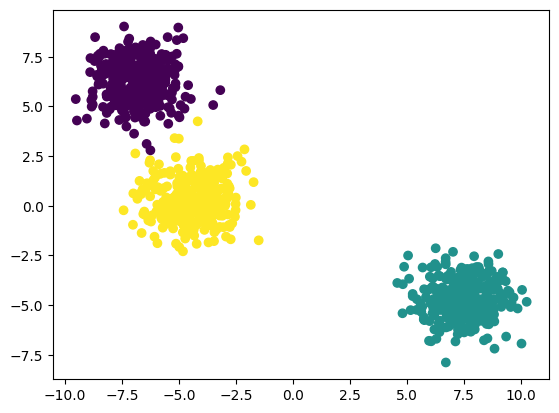

In [6]:
plt.scatter(x[:,0],x[:,1],c=y)

In [8]:
scaler=StandardScaler()

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [11]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [12]:
from sklearn.cluster import KMeans

In [16]:
#elbow method
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x_train)
  wcss.append(kmeans.inertia_)

wcss

[1340.0000000000018,
 250.95388661919029,
 50.275878464882695,
 42.11984475162959,
 35.06660872204258,
 32.85008119078054,
 25.75377135121668,
 23.892477849721054,
 22.788671125179146,
 19.831834768419494]

([<matplotlib.axis.XTick at 0x791d4f8ab7d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

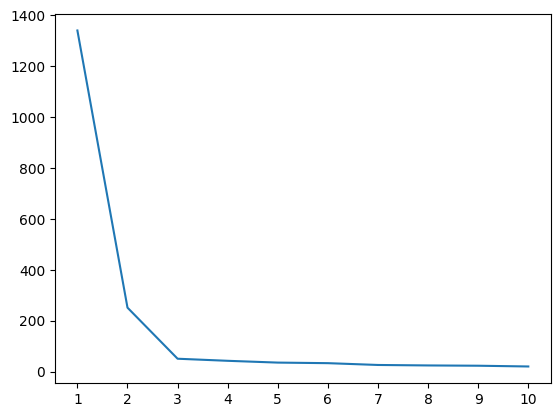

In [18]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))


In [19]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit(x_train)
y_pred=kmeans.predict(x_test)

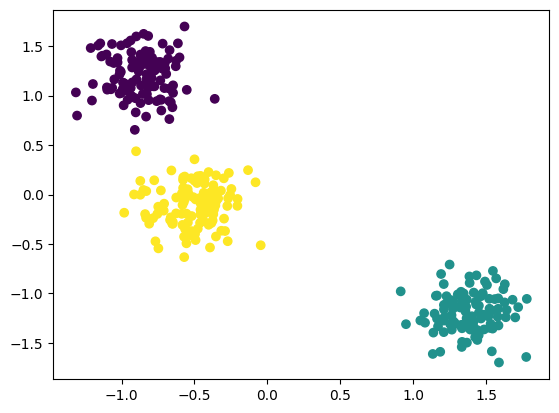

In [20]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [21]:
pip install kneed

In [23]:
from kneed import KneeLocator

In [25]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [38]:
kl.knee

np.int64(3)

In [28]:
from sklearn.metrics import silhouette_score

In [40]:
silcoef=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silcoef.append(score)

In [41]:
silcoef

[np.float64(0.7407675398308131),
 np.float64(0.7728032465922456),
 np.float64(0.6395420791467696),
 np.float64(0.4814145480048073),
 np.float64(0.4763157461430759),
 np.float64(0.5124666047738504),
 np.float64(0.35654873873431364),
 np.float64(0.3425602150514825),
 np.float64(0.3273356705436478)]

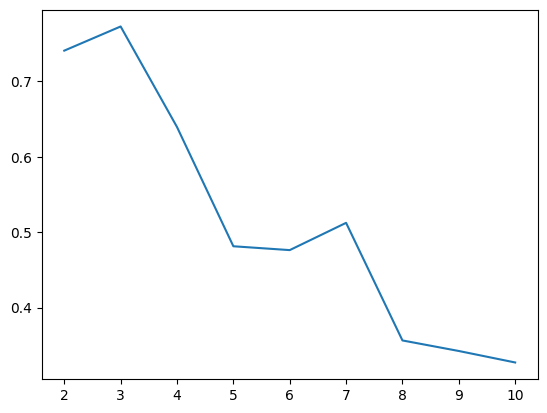

In [42]:
plt.plot(range(2,11),silcoef)